# Plug-AI : Inference on new data

### Config file

In [8]:
%%writefile config_inference_demo.yaml
# Default config is used even if no config file is specified in CLI. Undefined arguments will take the default values.
##################################################################################################
####################################### Global arguments : #######################################
##################################################################################################
config_file: null
export_config: null
mode: INFERENCE
verbose: FULL
seed: null
export_dir: /gpfswork/rech/ibu/commun/Demo_BraTS_SegResNet_300523
##################################################################################################
######################################## Data arguments : ########################################
##################################################################################################
dataset: BraTS
dataset_kwargs:
    dataset_dir: /gpfswork/rech/ibu/commun/BraTS2021/Test_Inference # Absolute path to the dataset root dir
    download_dataset: false
    transformation: BraTS_transform
train_ratio: 0.8
val_ratio: 0.2
batch_size: 3
shuffle: false
drop_last: false
##################################################################################################
####################################### Model arguments : ########################################
##################################################################################################
model: SegResNet
model_kwargs:
    blocks_down: [1, 2, 2, 4]
    blocks_up: [1, 1, 1]
    init_filters: 16
    in_channels: 4
    out_channels: 3
    dropout_prob: 0.2
model_weights_path: /gpfswork/rech/ibu/commun/Demo_BraTS_SegResNet_300523/model_backup.pt
##################################################################################################
##################################### Execution arguments : ######################################
##################################################################################################
#Training settings
nb_epoch: 10
device: cuda
random_seed: 2022  # None for real randomness, set an integer for reproductibility
report_log: False
loop: Inferer_SW

Overwriting config_inference_demo.yaml


### Execution

In [2]:
!python -m plug_ai --config_file config_inference_demo.yaml

/gpfsdswork/projects/rech/ibu/ssos023/Plug-AI/examples/config_inference_demo.yaml
Plug-AI given kwargs:
	 dataset : BraTS
	 dataset_kwargs : {'dataset_dir': '/gpfswork/rech/ibu/commun/BraTS2021/Test_Inference', 'download_dataset': False, 'transformation': 'BraTS_transform'}
	 limit_sample : None
	 preprocess : None
	 preprocess_kwargs : None
	 model : SegResNet
	 model_kwargs : {'blocks_down': [1, 2, 2, 4], 'blocks_up': [1, 1, 1], 'init_filters': 16, 'in_channels': 4, 'out_channels': 3, 'dropout_prob': 0.2}
	 model_weights_path : /gpfsdswork/projects/rech/ibu/ssos023/Plug-AI/examples/Training_Inference_demo/model_best2.pt
	 nb_epoch : 10
	 learning_rate : 5e-05
	 device : cuda
	 random_seed : 2022
	 report_log : False
	 loop : Inferer_SW
	 loop_kwargs : None
	 optimizer : AdamW
	 optimizer_kwargs : {'lr': 0.0001, 'weight_decay': 1e-05}
	 lr_scheduler : None
	 lr_scheduler_kwargs : None
	 criterion : DiceCELoss
	 criterion_kwargs : {'sigmoid': True}
	 metric : None
	 metric_kwargs : Non

## Visualisation of a prediction

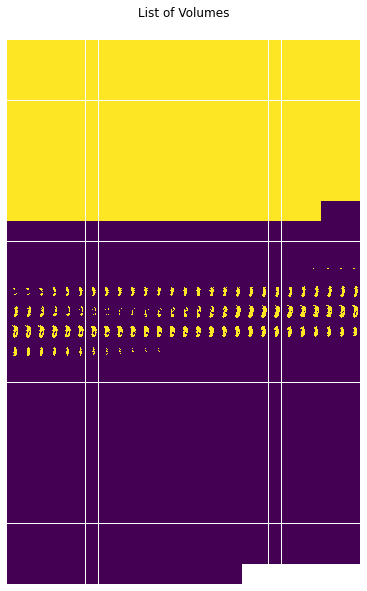

In [18]:
import os
from monai.transforms import LoadImaged
from monai.visualize import matshow3d
import matplotlib.pyplot as plt

directory = "/gpfswork/rech/ibu/commun/Demo_BraTS_SegResNet_300523/Predictions"
file_name = "BraTS2021_01662_prediction.nii.gz"
file_path = os.path.join(directory, file_name)

# Load the NIfTI file as a numpy array
keys = ["segmentation"]
loader = LoadImaged(keys)
data = loader({"segmentation": file_path})

fig = plt.figure()
matshow3d(data["segmentation"], fig=fig, title="List of Volumes")
plt.show()